# Basic pandas

In the Python ecosystem, `pandas` is a popular library for data analysis and manipulation.

- Flexible
- Easy to use
- Tabular data structures
- Time series

## Built on

- Numpy - multidimensional arrays
- Matplotlib - data visualization

## Alternatives/complement to pandas

- Polars
- Dask
- Geopandas

In [1]:
# Included in Python
import random

# Requires installation
import pandas as pd
import numpy as np

## Constructing Pandas dataframes 

In [2]:
ages = random.sample(range(18,90), 5)
ages

[22, 82, 57, 70, 26]

In [3]:
names = ["A", "B", "C", "D", "E"]
names

['A', 'B', 'C', 'D', 'E']

In [4]:
df = pd.DataFrame({"Name": names, "Age": ages})
df

,Name,Age
0,A,22
1,B,82
2,C,57
3,D,70
4,E,26


In [5]:
df.head(2)

,Name,Age
0,A,22
1,B,82


In [6]:
df.tail(2)

,Name,Age
3,D,70
4,E,26


In [7]:
df.dtypes

Name    object
Age      int64
dtype: object

## Indexing dataframes

### By position or condition

In [8]:
df.Name

0    A
1    B
2    C
3    D
4    E
Name: Name, dtype: object

In [9]:
df["Name"]

0    A
1    B
2    C
3    D
4    E
Name: Name, dtype: object

In [10]:
df.loc[0,:]

Name     A
Age     22
Name: 0, dtype: object

In [11]:
df.loc[0, "Name"]

'A'

In [12]:
df.loc[df["Age"] > 50,] 

,Name,Age
1,B,82
2,C,57
3,D,70


In [13]:
df.loc[df["Age"] > 50, "Name"] 

1    B
2    C
3    D
Name: Name, dtype: object

### By indexes

In [14]:
df.iloc[0,0]

'A'

In [15]:
df.iloc[0,:]

Name     A
Age     22
Name: 0, dtype: object

In [16]:
df.iloc[-1,:]

Name     E
Age     26
Name: 4, dtype: object

## Combining dataframes

In [17]:
dfA = df.copy()
dfA

,Name,Age
0,A,22
1,B,82
2,C,57
3,D,70
4,E,26


In [18]:
dfB = df.copy()
dfB

,Name,Age
0,A,22
1,B,82
2,C,57
3,D,70
4,E,26


In [19]:
dfB["Name"] = ["A", "B", "H", "I", "J"]
dfB

,Name,Age
0,A,22
1,B,82
2,H,57
3,I,70
4,J,26


In [20]:
dfB["Retired"] = np.where(df["Age"] > 55, True, False)
dfB

,Name,Age,Retired
0,A,22,False
1,B,82,True
2,H,57,True
3,I,70,True
4,J,26,False


In [21]:
dfB["Age"].apply(lambda row: True if row > 55 else False)

0    False
1     True
2     True
3     True
4    False
Name: Age, dtype: bool

In [22]:
dfB = dfB.drop("Age", axis=1)
dfB

,Name,Retired
0,A,False
1,B,True
2,H,True
3,I,True
4,J,False


In [23]:
dfA

,Name,Age
0,A,22
1,B,82
2,C,57
3,D,70
4,E,26


In [24]:
inner = pd.merge(dfA, dfB, on="Name", how="inner")
inner

,Name,Age,Retired
0,A,22,False
1,B,82,True


In [25]:
left = pd.merge(dfA, dfB, on="Name", how="left")
left

,Name,Age,Retired
0,A,22,False
1,B,82,True
2,C,57,NaN
3,D,70,NaN
4,E,26,NaN


In [26]:
right = pd.merge(dfA, dfB, on="Name", how="right")
right

,Name,Age,Retired
0,A,22.0,False
1,B,82.0,True
2,H,NaN,True
3,I,NaN,True
4,J,NaN,False


In [27]:
outer = pd.merge(dfA, dfB, on="Name", how="outer")
outer

,Name,Age,Retired
0,A,22.0,False
1,B,82.0,True
2,C,57.0,NaN
3,D,70.0,NaN
4,E,26.0,NaN
5,H,NaN,True
6,I,NaN,True
7,J,NaN,False


In [28]:
outer[outer["Retired"].isna()]

,Name,Age,Retired
2,C,57.0,NaN
3,D,70.0,NaN
4,E,26.0,NaN


In [29]:
outer[~outer["Retired"].isna()]

,Name,Age,Retired
0,A,22.0,False
1,B,82.0,True
5,H,NaN,True
6,I,NaN,True
7,J,NaN,False


In [30]:
outer[(~outer["Retired"].isna()) & (~outer["Age"].isna())]

,Name,Age,Retired
0,A,22.0,False
1,B,82.0,True


In [31]:
outer.describe()

,Age
count,5.000000
mean,51.400000
std,26.566897
min,22.000000
25%,26.000000
50%,57.000000
75%,70.000000
max,82.000000


## Saving dataframe to a file

In [32]:
outer.to_csv("../../data/tidy/outer_example.csv")

## Reading a dataframe from a file

In [33]:
df = pd.read_csv("../../data/raw/Seat.csv")
df.shape

(6514, 20)

In [34]:
df.head()

,X,Y,OBJECTID,SAPOBJECTID,CLASS,GIS_USER_STATUS,OBJECT_TYPE,GIS_SYSTEM_STATUS,SEAT_TYPE,SEAT_STYLE,SEAT_MATERIAL,NO_OF_PLACES,ARMRESTS,SLAB,FINISH,FUNCTIONAL_LOC,SUPERORD_EQUIP,GIS_DESCRIPTION,SORT_FIELD,GlobalID
0,153.407401,-27.949350,1,6000109164,SEAT,INSV,SEAT,INST,BENCH WITH BACK,ALUMINIUM STYLE BENCH,ALUMINIUM,4.0,N,Y,POWDERCOATED,R-C-CENTRALSTREETXX,NaN,SEAT,6920,{062B0369-960A-412C-B9E9-262D1D3FD739}
1,153.414325,-27.968619,2,6000122608,SEAT,INSV,SEAT,INST,BENCH,STONE SEAT,STONE,1.0,N,N,NaN,R-Y-YOUNGSTREETXXXX,NaN,Seat,NaN,{809D184B-1197-4314-8809-9BF2C324AD15}
2,153.430463,-28.002184,3,6000108920,SEAT,INSV,SEAT,INST,BENCH WITH BACK,OLD STYLE TIMBER BENCH,TIMBER AND CONCRETE,NaN,Y,N,NaN,R-C-CAVILLAVENUEXXX,NaN,SEAT.,79375,{EBF5F524-ACF0-4BCC-B69B-0688508BB314}
3,153.451864,-28.090265,4,6000109171,SEAT,INSV,SEAT,INST,BENCH WITH BACK,ALUMINIUM STYLE BENCH,ALUMINIUM AND STEEL,4.0,N,N,PAINTED,R-C-CONNORSTREETXXX,NaN,SEAT,6930,{DFA235DD-34D3-4788-B2A4-6708FC8539E3}
4,153.398992,-28.069485,5,6000104550,SEAT,INSV,SEAT,INST,BENCH WITH BACK,ALUMINIUM STYLE BENCH,ALUMINIUM AND STEEL,4.0,Y,Y,POWDERCOATED,R-K-KILLARNEYAVENUE,NaN,SEAT,59286,{BA6143A1-2A5F-4117-A60D-9D51736B63C0}


In [35]:
df.describe()

,X,Y,OBJECTID,SAPOBJECTID,NO_OF_PLACES
count,6514.000000,6514.000000,6514.000000,6.514000e+03,1539.000000
mean,153.400264,-27.998456,3257.500000,6.000103e+09,3.625081
std,0.062686,0.097626,1880.574159,5.968764e+04,1.990986
min,153.179252,-28.208498,1.000000,6.000030e+09,1.000000
25%,153.364667,-28.073397,1629.250000,6.000048e+09,3.000000
50%,153.409760,-28.000533,3257.500000,6.000105e+09,4.000000
75%,153.431312,-27.941035,4885.750000,6.000153e+09,4.000000
max,153.551285,-27.711392,6514.000000,6.000223e+09,28.000000


In [36]:
df["X"].min(), df["X"].max()

(153.179251531, 153.551284953)

<Axes: >

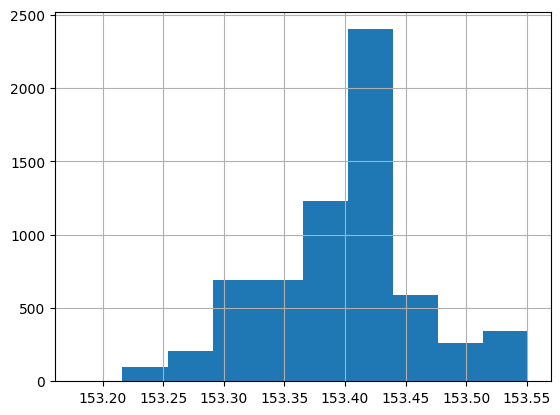

In [37]:
df["X"].hist()

In [38]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'SAPOBJECTID', 'CLASS', 'GIS_USER_STATUS',
       'OBJECT_TYPE', 'GIS_SYSTEM_STATUS', 'SEAT_TYPE', 'SEAT_STYLE',
       'SEAT_MATERIAL', 'NO_OF_PLACES', 'ARMRESTS', 'SLAB', 'FINISH',
       'FUNCTIONAL_LOC', 'SUPERORD_EQUIP', 'GIS_DESCRIPTION', 'SORT_FIELD',
       'GlobalID'],
      dtype='object')

In [39]:
df["NO_OF_PLACES"].unique()

array([ 4.,  1., nan,  3.,  2.,  5.,  6., 12.,  8.,  9., 20., 28., 10.,
        7., 16., 14., 24.])

In [40]:
df.groupby(["NO_OF_PLACES"]).count()

,X,Y,OBJECTID,SAPOBJECTID,CLASS,GIS_USER_STATUS,OBJECT_TYPE,GIS_SYSTEM_STATUS,SEAT_TYPE,SEAT_STYLE,SEAT_MATERIAL,ARMRESTS,SLAB,FINISH,FUNCTIONAL_LOC,SUPERORD_EQUIP,GIS_DESCRIPTION,SORT_FIELD,GlobalID
NO_OF_PLACES,,,,,,,,,,,,,,,,,,,
1.0,146,146,146,146,146,146,146,146,146,146,146,138,141,123,146,0,146,0,146
2.0,88,88,88,88,88,88,88,88,88,88,88,84,80,61,88,8,88,1,88
3.0,502,502,502,502,502,502,502,502,502,502,502,491,493,404,502,82,502,21,502
4.0,649,649,649,649,649,649,649,649,649,649,649,633,634,602,649,19,649,366,649
5.0,38,38,38,38,38,38,38,38,38,38,38,38,38,37,38,0,38,6,38
6.0,66,66,66,66,66,66,66,66,66,66,66,66,66,64,66,10,66,1,66
7.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,0,2
8.0,15,15,15,15,15,15,15,15,15,15,15,15,14,13,15,2,15,0,15
9.0,5,5,5,5,5,5,5,5,5,5,5,5,3,3,5,0,5,0,5


In [41]:
df[df["NO_OF_PLACES"]==28.0]

,X,Y,OBJECTID,SAPOBJECTID,CLASS,GIS_USER_STATUS,OBJECT_TYPE,GIS_SYSTEM_STATUS,SEAT_TYPE,SEAT_STYLE,SEAT_MATERIAL,NO_OF_PLACES,ARMRESTS,SLAB,FINISH,FUNCTIONAL_LOC,SUPERORD_EQUIP,GIS_DESCRIPTION,SORT_FIELD,GlobalID
2114,153.249437,-27.798912,2115,6000150057,SEAT,INSV,SEAT,ASEQ,BENCH,URBAN SUITE PARK BENCH,STEEL & RECYCLED PLASTIC,28.0,N,N,PLAIN,K-BIGBLU,000000006000149944,Seat,NaN,{E8420A70-CEDD-451C-ADBE-AC79D53CA569}


In [42]:
df.groupby(["NO_OF_PLACES", "ARMRESTS"]).count()

X    Y  OBJECTID  SAPOBJECTID  CLASS  \
NO_OF_PLACES ARMRESTS                                           
1.0          N         135  135       135          135    135   
             Y           3    3         3            3      3   
2.0          N          64   64        64           64     64   
             Y          20   20        20           20     20   
3.0          N         246  246       246          246    246   
             Y         245  245       245          245    245   
4.0          N         349  349       349          349    349   
             Y         284  284       284          284    284   
5.0          N          29   29        29           29     29   
             Y           9    9         9            9      9   
6.0          N          58   58        58           58     58   
             Y           8    8         8            8      8   
7.0          N           1    1         1            1      1   
             Y           1    1         1            1      1   
8.0          N          11   11        11           11     11   
             Y           4    4         4            4      4   
9.0          N           4    4         4            4      4   
             Y           1    1         1            1      1   
10.0         N           7    7         7            7      7   
             Y           3    3         3            3      3   
12.0         N           4    4         4            4      4   
             Y           2    2         2            2      2   
14.0         N           3    3         3            3      3   
16.0         N           1    1         1            1      1   
20.0         N           3    3         3            3      3   
24.0         N           2    2         2            2      2   
28.0         N           1    1         1            1      1   

                       GIS_USER_STATUS  OBJECT_TYPE  GIS_SYSTEM_STATUS  \
NO_OF_PLACES ARMRESTS                                                    
1.0          N                     135          135                135   
             Y                       3            3                  3   
2.0          N                      64           64                 64   
             Y                      20           20                 20   
3.0          N                     246          246                246   
             Y                     245          245                245   
4.0          N                     349          349                349   
             Y                     284          284                284   
5.0          N                      29           29                 29   
             Y                       9            9                  9   
6.0          N                      58           58                 58   
             Y                       8            8                  8   
7.0          N                       1            1                  1   
             Y                       1            1                  1   
8.0          N                      11           11                 11   
             Y                       4            4                  4   
9.0          N                       4            4                  4   
             Y                       1            1                  1   
10.0         N                       7            7                  7   
             Y                       3            3                  3   
12.0         N                       4            4                  4   
             Y                       2            2                  2   
14.0         N                       3            3                  3   
16.0         N                       1            1                  1   
20.0         N                       3            3                  3   
24.0         N                       2            2                  2   
28.0         N                       1            1                